In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data = train_data.drop(['Name','Ticket'], axis=1)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
len(train_data)

891

In [8]:
len(train_data.dropna())

183

In [9]:
train_data['Cabin'].isna().sum()

687

<p>Dropping Cabin as there are too many NaN values

In [10]:
train_data = train_data.drop(['Cabin'],axis=1)

In [11]:
train_data[train_data['Pclass']==3].mean()

PassengerId    439.154786
Survived         0.242363
Pclass           3.000000
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
dtype: float64

In [12]:
train_data[train_data['Pclass']==2].mean()

PassengerId    445.956522
Survived         0.472826
Pclass           2.000000
Age             29.877630
SibSp            0.402174
Parch            0.380435
Fare            20.662183
dtype: float64

In [13]:
train_data[train_data['Pclass']==1].mean()

PassengerId    461.597222
Survived         0.629630
Pclass           1.000000
Age             38.233441
SibSp            0.416667
Parch            0.356481
Fare            84.154687
dtype: float64

<p>Can drop Fare as Passenger class column is indicative of Fare

In [14]:
train_data = train_data.drop(['Fare'], axis=1)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [16]:
train_data['Sex'].replace({'female':0,'male':1},inplace=True)

In [17]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
train_data['Embarked'].replace({'S':0,'C':1,'Q':3,np.nan:0}, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,1
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,0
4,5,0,3,1,35.0,0,0,0


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf

Using TensorFlow backend.


In [20]:
model = Sequential()

In [21]:
mean_age=train_data['Age'].mean()

In [22]:
train_data.replace({np.nan:abs(mean_age)},inplace=True)

In [23]:
X_train,x_test,Y_train,y_test = train_test_split(train_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']], train_data['Survived'])

In [24]:
X_train.shape,Y_train.shape

((668, 6), (668,))

In [25]:
model.add(Dense(50,activation='relu',input_dim=6,kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(150,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(50,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [27]:
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                350       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [29]:
import time
start=time.time()
test_model_op = model.fit(train_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']], train_data['Survived'],epochs=1000,verbose=0)
print("Time take to run :"+str(time.time()-start)+" seconds")

Time take to run :71.95086669921875 seconds


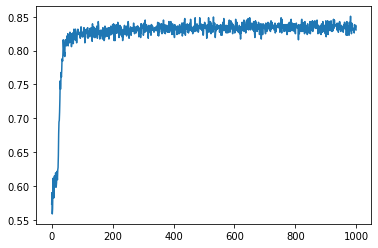

In [30]:
plt.plot(test_model_op.history['accuracy'])

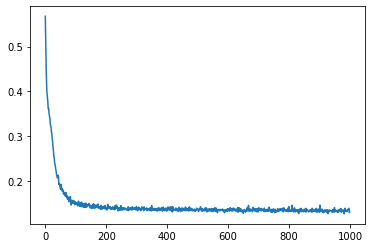

In [31]:
plt.plot(test_model_op.history['loss'])

In [32]:
test_data = pd.read_csv('test.csv')

test_data.head()

test_data.drop(['Name','Ticket','Fare','Cabin'], axis=1,inplace=True)

test_data['Sex'].replace({'female':0,'male':1},inplace=True)

test_data['Embarked'].replace({'S':0,'C':1,'Q':3,np.nan:0}, inplace=True)

test_data.head()

mean_age=test_data['Age'].mean()
test_data.replace({np.nan:abs(mean_age)},inplace=True)

In [33]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,3
1,893,3,0,47.0,1,0,0
2,894,2,1,62.0,0,0,3
3,895,3,1,27.0,0,0,0
4,896,3,0,22.0,1,1,0


In [34]:
y_pred = model.predict(test_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']])

y_pred = np.round(y_pred)

pred_list = []
for i in y_pred:
    pred_list.append(i[0])


In [35]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pd.Series(pred_list)})

submission['Survived'] = submission['Survived'].apply(lambda x: int(x))
submission.set_index('PassengerId',inplace=True)

submission.describe()


,Survived
count,418.000000
mean,0.279904
std,0.449490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [36]:
submission.to_csv('submission.csv')